# Let's understand the data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectPercentile, f_classif

In [39]:
data = pd.read_csv('data/train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [40]:
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


# Turns out our features are complete

In [41]:
features = list(data.drop('TARGET', axis=1).columns)
feature_completeness = pd.Series()
for f in features:
    feature_completeness[f] = 100.0*len(data[f].dropna())/len(data[f])
feature_completeness.describe()

count    370
mean     100
std        0
min      100
25%      100
50%      100
75%      100
max      100
dtype: float64

# Feature Engineering

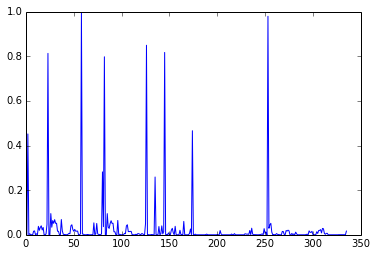

In [85]:
selector = SelectPercentile(f_classif)
selector.fit(data[features], data['TARGET'])

scores = pd.DataFrame(selector.scores_, columns=['scores'], index=features).dropna()
scores /= scores.max()
plt.plot(scores)

In [86]:
features_selected = list(scores[scores > .05].dropna().index)
features_selected

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13',
 'ind_var30',
 'ind_var39_0',
 'ind_var41_0',
 'num_var4',
 'num_var5',
 'num_var8_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13',
 'num_var30_0',
 'num_var30',
 'num_var35',
 'num_var42',
 'saldo_var30',
 'var36',
 'num_meses_var5_ult3',
 'num_meses_var13_corto_ult3']

In [88]:
data[features_selected].head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13,ind_var30,...,num_var13_corto,num_var13,num_var30_0,num_var30,num_var35,num_var42,saldo_var30,var36,num_meses_var5_ult3,num_meses_var13_corto_ult3
0,23,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0.00,99,0,0
1,34,0,0,0,0,1,1,1,1,1,...,3,3,6,3,3,0,300.00,3,1,3
2,23,1,0,0,0,0,0,0,0,1,...,0,0,3,3,3,3,3.00,99,3,0
3,37,1,0,0,0,0,0,0,0,1,...,0,0,3,3,9,3,70.62,2,2,0
4,39,0,0,1,1,0,0,0,0,1,...,0,0,6,3,3,3,135003.00,1,3,0
